In [56]:
import tfcomb
C = tfcomb.CombObj(verbosity=0)

# Biological question: Are there differences in the binding distance of the same TF-pair in different clusters? - PART2
#### Data: WP2 - body of pancreas- cluster 2 <-> cluster 9

### Outline of this notebook:
This notbook presents the second part of the analysis if there is a difference in the binding distnace of the same TF-pair in different clusters. If you have not done the PARt 1 first, do the PART 1 first. Here the second cluster is analysed. The results of the first cluster are then imprted, merged together and the comparison of the binding distance are done. 
    1. Implementation of distance analysis for second cluster and transfering in dataframe
    2. Importing the results of the first cluster
    3. Merging the results of first and second cluster
    4. Comparing the binding distances between the same TF-pairs in the two clusters.

## 1. Implementation of distance analysis for cluster
1. Read in path of the the pkl file from already performed market basket analysis (alternative: perform normal market basket analysis)
2. selecting of TF-pairs
3. performing distance analysis with considering the noisiness (lower noise, "clearer/better" analysis)
4. Saving results with peak height above 2.8 of cluster in dataframe df_distance_cluster9

In [6]:
from tfcomb import CombObj
pancreas_cluster2_object = CombObj().from_pickle("/mnt/workspace_stud/stud6/repositories/Datenanalyse-2021/wp6/analyse/results/wp2/main/JF1O6_body_of_pancreas/JF1O6_body_of_pancreas.9_peaks.pkl")

INFO: x_threshold is None; trying to calculate optimal threshold
INFO: y_threshold is None; trying to calculate optimal threshold
INFO: Creating subset of TFBS and rules using thresholds


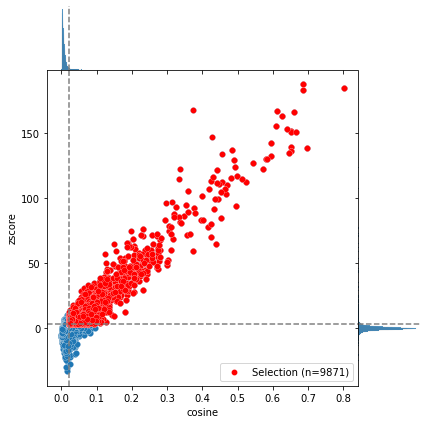

In [7]:
pancreas_cluster9_object_selected = pancreas_cluster2_object.select_significant_rules()

In [8]:
pancreas_cluster9_object_selected.analyze_distances(threads=6)

INFO: DistObject successfully created! It can be accessed via combobj.distObj
INFO: Calculating distances
INFO: Normalizing data.
INFO: Done finding distances! Results are found in .distances
INFO: Run .linregress_all() to fit linear regression
INFO: Fitting linear regression. With number of threads: 6
INFO: Linear regression finished! Results can be found in .linres
INFO: Correcting background with 6 threads.
INFO: Background correction finished! Results can be found in .corrected
INFO: Smoothing signals with window size 3
INFO: Shifting signals above zero
INFO: Analyzing Signal with threads 6
INFO: Done analyzing signal. Results are found in .peaks


In [9]:
pancreas_cluster9_object_selected.distObj.evaluate_noise(threads=6)
pancreas_cluster9_object_selected.distObj.rank_rules()

INFO: Evaluating noisiness of the signals with 6 threads


In [11]:
df_distance_cluster9=pancreas_cluster9_object_selected.distObj.peaks

In [19]:
df_distance_cluster9=df_distance_cluster9[(df_distance_cluster9["Peak Heights"]>2.8)]
df_distance_cluster9

,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank
11752,MEF2D,SREBF1var.2,46,6.018378,6.219326,2,96,0.895833,0.004316,8.0,52.0,49.0,36.333333
17194,SREBF1var.2,MEF2D,46,6.018378,6.219326,2,96,0.895833,0.004316,8.0,52.0,49.0,36.333333
2448,E2F1,E2F4,50,5.715579,5.890340,2,2,1.000000,0.000602,1.0,112.0,7.0,40.000000
19820,ZBED1,ZBED1,50,5.715579,5.890340,2,1,1.000000,0.000602,1.0,112.0,7.0,40.000000
2456,E2F4,E2F1,50,5.715579,5.890340,2,2,1.000000,0.000602,1.0,112.0,7.0,40.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4875,ETV5,SP2,84,2.834509,4.296950,2,136,0.058824,0.292761,1547.0,3565.0,4134.0,3082.000000
21426,ZNF263,SP4,14,2.813796,3.804520,2,416,0.062500,0.297121,1443.0,3664.0,4158.0,3088.333333
16614,SP4,ZNF263,14,2.813796,3.804520,2,416,0.062500,0.297121,1443.0,3664.0,4158.0,3088.333333
9376,KLF15,FOSL2JUNvar.2,72,2.803738,3.947913,2,181,0.055249,0.290034,1642.0,3700.0,4106.0,3149.333333


## 2. Importing the results of the first cluster

In [2]:
import pandas as pd

In [15]:
df_distance_cluster2_csv=pd.read_csv("/mnt/workspace_stud/stud7/Datenanalyse-2021/wp6/analyse/distanceresultsfordifference/distance_bodyofpancreascluster2.csv")

In [20]:
df_distance_cluster2_csv

,Unnamed: 0,TF1,TF2,Distance,Peak Heights,Prominences,Threshold,TF1_TF2_count,Distance_percent,Noisiness,rank_Distance_percent,rank_Peak Heights,rank_Noisiness,mean_rank
0,2044,CUX2,HOXA9,50,5.715579,5.890340,2,1,1.000000,0.000602,1.0,81.0,10.0,30.666667
1,7929,HOXA9,CUX2,50,5.715579,5.890340,2,1,1.000000,0.000602,1.0,81.0,10.0,30.666667
2,2540,E2F4,E2F1,50,5.715579,5.890340,2,2,1.000000,0.000602,1.0,82.0,10.0,31.000000
3,2458,E2F1,E2F4,50,5.715579,5.890340,2,2,1.000000,0.000602,1.0,82.0,10.0,31.000000
4,15498,SOHLH2,MNT,70,6.003757,6.317780,2,5,0.600000,0.000318,52.0,39.0,3.0,31.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8625,20814,Znf281,KLF15,80,2.833690,4.894403,2,527,0.051233,0.292066,1280.0,3606.0,3797.0,2894.333333
8626,3008,EGR3,ZNF460,100,2.868682,2.868682,2,196,0.040816,0.335458,1393.0,3453.0,3949.0,2931.666667
8627,20383,ZNF460,EGR3,100,2.868682,2.868682,2,196,0.040816,0.335458,1393.0,3453.0,3949.0,2931.666667
8628,2897,EGR3,CTCFL,95,2.819587,2.819587,2,132,0.060606,0.405439,1116.0,3670.0,4046.0,2944.000000


 ## 3. Merging the results of first and second cluster

In [22]:
df_distancedifference_2clusters=df_distance_cluster2_csv.merge(df_distance_cluster9,suffixes=('_C2', '_C9'), left_on =["TF1","TF2"], right_on = ["TF1","TF2"])
df_distancedifference_2clusters

,Unnamed: 0,TF1,TF2,Distance_C2,Peak Heights_C2,Prominences_C2,Threshold_C2,TF1_TF2_count_C2,Distance_percent_C2,Noisiness_C2,rank_Distance_percent_C2,rank_Peak Heights_C2,rank_Noisiness_C2,mean_rank_C2,Distance_C9,Peak Heights_C9,Prominences_C9,Threshold_C9,TF1_TF2_count_C9,Distance_percent_C9,Noisiness_C9,rank_Distance_percent_C9,rank_Peak Heights_C9,rank_Noisiness_C9,mean_rank_C9
0,2540,E2F4,E2F1,50,5.715579,5.890340,2,2,1.000000,0.000602,1.0,82.0,10.0,31.000000,50,5.715579,5.890340,2,2,1.000000,0.000602,1.0,112.0,7.0,40.000000
1,2458,E2F1,E2F4,50,5.715579,5.890340,2,2,1.000000,0.000602,1.0,82.0,10.0,31.000000,50,5.715579,5.890340,2,2,1.000000,0.000602,1.0,112.0,7.0,40.000000
2,2490,E2F2,E2F1,49,5.715476,5.890452,2,2,1.000000,0.001204,1.0,83.0,23.0,35.666667,49,5.715476,5.890452,2,2,1.000000,0.001204,1.0,113.0,14.0,42.666667
3,2457,E2F1,E2F3,49,5.715476,5.890452,2,2,1.000000,0.001204,1.0,83.0,23.0,35.666667,49,5.715476,5.890452,2,2,1.000000,0.001204,1.0,113.0,14.0,42.666667
4,2515,E2F3,E2F1,49,5.715476,5.890452,2,2,1.000000,0.001204,1.0,83.0,23.0,35.666667,49,5.715476,5.890452,2,2,1.000000,0.001204,1.0,113.0,14.0,42.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,9457,KLF15,Arntl,100,2.909926,2.909926,2,163,0.030675,0.283546,1439.0,3289.0,3748.0,2825.333333,4,3.039406,3.039406,2,227,0.079295,0.204909,978.0,2737.0,2836.0,2183.666667
5617,10486,KLF5,ZEB1,54,2.837959,4.792386,2,239,0.062762,0.333986,1078.0,3592.0,3941.0,2870.333333,54,3.380077,5.075116,2,361,0.060942,0.199494,1491.0,1716.0,2739.0,1982.000000
5618,19473,ZEB1,KLF5,54,2.837959,4.792386,2,239,0.062762,0.333986,1078.0,3592.0,3941.0,2870.333333,54,3.380077,5.075116,2,361,0.060942,0.199494,1491.0,1716.0,2739.0,1982.000000
5619,2897,EGR3,CTCFL,95,2.819587,2.819587,2,132,0.060606,0.405439,1116.0,3670.0,4046.0,2944.000000,6,2.824243,4.938418,2,192,0.088542,0.455576,807.0,3617.0,4519.0,2981.000000


In [23]:
pd.set_option('max_columns', None)
df_distancedifference_2clusters.head(5)

,Unnamed: 0,TF1,TF2,Distance_C2,Peak Heights_C2,Prominences_C2,Threshold_C2,TF1_TF2_count_C2,Distance_percent_C2,Noisiness_C2,rank_Distance_percent_C2,rank_Peak Heights_C2,rank_Noisiness_C2,mean_rank_C2,Distance_C9,Peak Heights_C9,Prominences_C9,Threshold_C9,TF1_TF2_count_C9,Distance_percent_C9,Noisiness_C9,rank_Distance_percent_C9,rank_Peak Heights_C9,rank_Noisiness_C9,mean_rank_C9
0,2540,E2F4,E2F1,50,5.715579,5.890340,2,2,1.0,0.000602,1.0,82.0,10.0,31.000000,50,5.715579,5.890340,2,2,1.0,0.000602,1.0,112.0,7.0,40.000000
1,2458,E2F1,E2F4,50,5.715579,5.890340,2,2,1.0,0.000602,1.0,82.0,10.0,31.000000,50,5.715579,5.890340,2,2,1.0,0.000602,1.0,112.0,7.0,40.000000
2,2490,E2F2,E2F1,49,5.715476,5.890452,2,2,1.0,0.001204,1.0,83.0,23.0,35.666667,49,5.715476,5.890452,2,2,1.0,0.001204,1.0,113.0,14.0,42.666667
3,2457,E2F1,E2F3,49,5.715476,5.890452,2,2,1.0,0.001204,1.0,83.0,23.0,35.666667,49,5.715476,5.890452,2,2,1.0,0.001204,1.0,113.0,14.0,42.666667
4,2515,E2F3,E2F1,49,5.715476,5.890452,2,2,1.0,0.001204,1.0,83.0,23.0,35.666667,49,5.715476,5.890452,2,2,1.0,0.001204,1.0,113.0,14.0,42.666667


##  4. Comparing the binding distances between the same TF-pairs in the two clusters.
1. Calculating the difference between the binding distance per TF-pair
2. Calcultating the average peak Height of a TF-pair
3. Sorting the dataframe by the difference in the binding distance
4. looking at the distributiion of the differnce in the binding distance

In [24]:
df_distancedifference_2clusters['Difference between Distance'] = abs(df_distancedifference_2clusters['Distance_C2'] - df_distancedifference_2clusters['Distance_C9'])
df_distancedifference_2clusters['Average Peak Height'] = ((df_distancedifference_2clusters['Peak Heights_C2'] + df_distancedifference_2clusters['Peak Heights_C9'])/2)
df_distancedifference_2clusters['TF-pair'] = df_distancedifference_2clusters['TF1'] + " + " + df_distancedifference_2clusters['TF2']
df_distancedifference_2clusters

,Unnamed: 0,TF1,TF2,Distance_C2,Peak Heights_C2,Prominences_C2,Threshold_C2,TF1_TF2_count_C2,Distance_percent_C2,Noisiness_C2,rank_Distance_percent_C2,rank_Peak Heights_C2,rank_Noisiness_C2,mean_rank_C2,Distance_C9,Peak Heights_C9,Prominences_C9,Threshold_C9,TF1_TF2_count_C9,Distance_percent_C9,Noisiness_C9,rank_Distance_percent_C9,rank_Peak Heights_C9,rank_Noisiness_C9,mean_rank_C9,Difference between Distance,Average Peak Height,TF-pair
0,2540,E2F4,E2F1,50,5.715579,5.890340,2,2,1.000000,0.000602,1.0,82.0,10.0,31.000000,50,5.715579,5.890340,2,2,1.000000,0.000602,1.0,112.0,7.0,40.000000,0,5.715579,E2F4 + E2F1
1,2458,E2F1,E2F4,50,5.715579,5.890340,2,2,1.000000,0.000602,1.0,82.0,10.0,31.000000,50,5.715579,5.890340,2,2,1.000000,0.000602,1.0,112.0,7.0,40.000000,0,5.715579,E2F1 + E2F4
2,2490,E2F2,E2F1,49,5.715476,5.890452,2,2,1.000000,0.001204,1.0,83.0,23.0,35.666667,49,5.715476,5.890452,2,2,1.000000,0.001204,1.0,113.0,14.0,42.666667,0,5.715476,E2F2 + E2F1
3,2457,E2F1,E2F3,49,5.715476,5.890452,2,2,1.000000,0.001204,1.0,83.0,23.0,35.666667,49,5.715476,5.890452,2,2,1.000000,0.001204,1.0,113.0,14.0,42.666667,0,5.715476,E2F1 + E2F3
4,2515,E2F3,E2F1,49,5.715476,5.890452,2,2,1.000000,0.001204,1.0,83.0,23.0,35.666667,49,5.715476,5.890452,2,2,1.000000,0.001204,1.0,113.0,14.0,42.666667,0,5.715476,E2F3 + E2F1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5616,9457,KLF15,Arntl,100,2.909926,2.909926,2,163,0.030675,0.283546,1439.0,3289.0,3748.0,2825.333333,4,3.039406,3.039406,2,227,0.079295,0.204909,978.0,2737.0,2836.0,2183.666667,96,2.974666,KLF15 + Arntl
5617,10486,KLF5,ZEB1,54,2.837959,4.792386,2,239,0.062762,0.333986,1078.0,3592.0,3941.0,2870.333333,54,3.380077,5.075116,2,361,0.060942,0.199494,1491.0,1716.0,2739.0,1982.000000,0,3.109018,KLF5 + ZEB1
5618,19473,ZEB1,KLF5,54,2.837959,4.792386,2,239,0.062762,0.333986,1078.0,3592.0,3941.0,2870.333333,54,3.380077,5.075116,2,361,0.060942,0.199494,1491.0,1716.0,2739.0,1982.000000,0,3.109018,ZEB1 + KLF5
5619,2897,EGR3,CTCFL,95,2.819587,2.819587,2,132,0.060606,0.405439,1116.0,3670.0,4046.0,2944.000000,6,2.824243,4.938418,2,192,0.088542,0.455576,807.0,3617.0,4519.0,2981.000000,89,2.821915,EGR3 + CTCFL


In [45]:
df_distancedifference_2clusters_sorted=df_distancedifference_2clusters.sort_values(by=['Difference between Distance'])
df_distancedifference_2clusters_sorted.head(2220)

,Unnamed: 0,TF1,TF2,Distance_C2,Peak Heights_C2,Prominences_C2,Threshold_C2,TF1_TF2_count_C2,Distance_percent_C2,Noisiness_C2,rank_Distance_percent_C2,rank_Peak Heights_C2,rank_Noisiness_C2,mean_rank_C2,Distance_C9,Peak Heights_C9,Prominences_C9,Threshold_C9,TF1_TF2_count_C9,Distance_percent_C9,Noisiness_C9,rank_Distance_percent_C9,rank_Peak Heights_C9,rank_Noisiness_C9,mean_rank_C9,Difference between Distance,Average Peak Height,TF-pair
0,2540,E2F4,E2F1,50,5.715579,5.890340,2,2,1.000000,0.000602,1.0,82.0,10.0,31.000000,50,5.715579,5.890340,2,2,1.000000,0.000602,1.0,112.0,7.0,40.000000,0,5.715579,E2F4 + E2F1
5319,13273,NRF1,ETV3,30,2.845379,4.272816,2,53,0.094340,0.189188,478.0,3558.0,2607.0,2214.333333,30,3.007575,4.482763,2,63,0.095238,0.256899,701.0,2848.0,3752.0,2433.666667,0,2.926477,NRF1 + ETV3
3523,16390,SP8,CREM,41,3.364717,4.553807,2,42,0.119048,0.161687,323.0,1778.0,2089.0,1396.666667,41,3.427350,5.030392,2,61,0.098361,0.223022,657.0,1602.0,3203.0,1820.666667,0,3.396034,SP8 + CREM
3521,18796,YY1,ETV6,33,4.008927,5.138917,2,39,0.179487,0.233139,198.0,750.0,3242.0,1396.666667,33,2.923211,4.466731,2,60,0.116667,0.346017,509.0,3175.0,4400.0,2694.666667,0,3.466069,YY1 + ETV6
1744,3147,EHF,ERG,17,3.829082,4.707906,2,14,0.214286,0.106144,160.0,966.0,1393.0,839.666667,17,2.918869,3.850965,2,20,0.150000,0.062801,396.0,3190.0,796.0,1460.666667,0,3.373976,EHF + ERG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5087,9085,KLF11,NHLH2,60,3.349149,4.822582,2,64,0.093750,0.330066,491.0,1824.0,3927.0,2080.666667,59,3.278115,4.288227,2,88,0.125000,0.223824,467.0,1964.0,3222.0,1884.333333,1,3.313632,KLF11 + NHLH2
3827,4368,ETV3,ELF4,8,3.869530,5.671036,2,39,0.179487,0.245651,198.0,917.0,3401.0,1505.333333,9,3.059802,4.752617,2,47,0.127660,0.246271,459.0,2651.0,3599.0,2236.333333,1,3.464666,ETV3 + ELF4
3826,3335,ELF4,ETV3,8,3.869530,5.671036,2,39,0.179487,0.245651,198.0,917.0,3401.0,1505.333333,9,3.059802,4.752617,2,47,0.127660,0.246271,459.0,2651.0,3599.0,2236.333333,1,3.464666,ELF4 + ETV3
2448,1394,BHLHE40,SREBF2var.2,18,3.331147,4.526662,2,29,0.206897,0.093537,167.0,1862.0,1262.0,1097.000000,17,3.048179,4.256536,2,44,0.181818,0.130085,327.0,2696.0,1503.0,1508.666667,1,3.189663,BHLHE40 + SREBF2var.2


In [62]:
df_differencedistane_distribution= df_distancedifference_2clusters_sorted.groupby('Difference between Distance').count()
df_differencedistane_distribution['TF2']

Difference between Distance
0      2118
1       519
2       204
3        26
4        39
       ... 
94        8
95        4
96        8
99        2
100       4
Name: TF2, Length: 99, dtype: int64

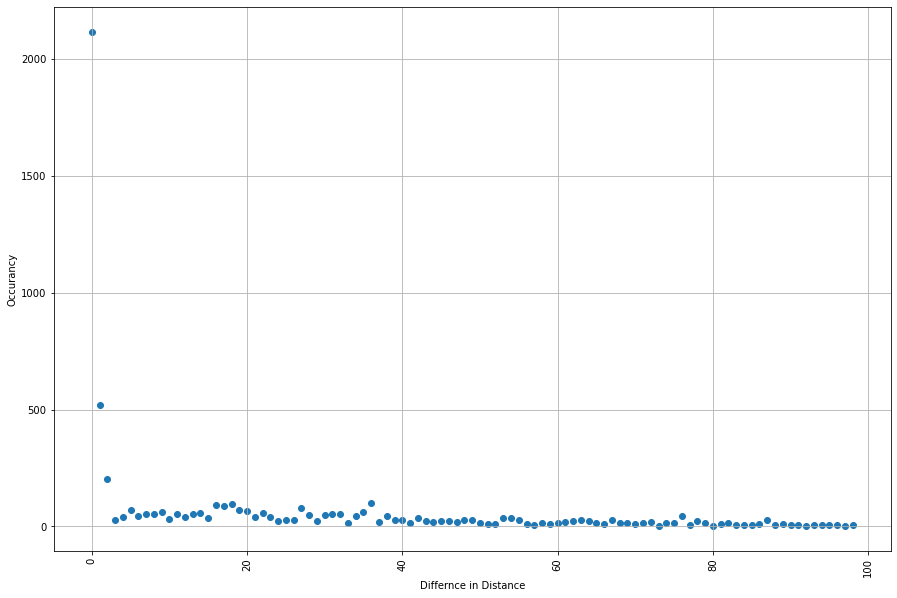

In [71]:
import matplotlib.pyplot as plt

differencedistance = range(0,99)#df_differencedistane_distribution['TF1']
occurancy = df_differencedistane_distribution['TF1']

plt.figure(figsize=(15, 10))
plt.scatter(differencedistance,occurancy)
plt.xticks(rotation='vertical')
plt.grid(True)
plt.xlabel('Differnce in Distance')
plt.ylabel('Occurancy')


plt.show()

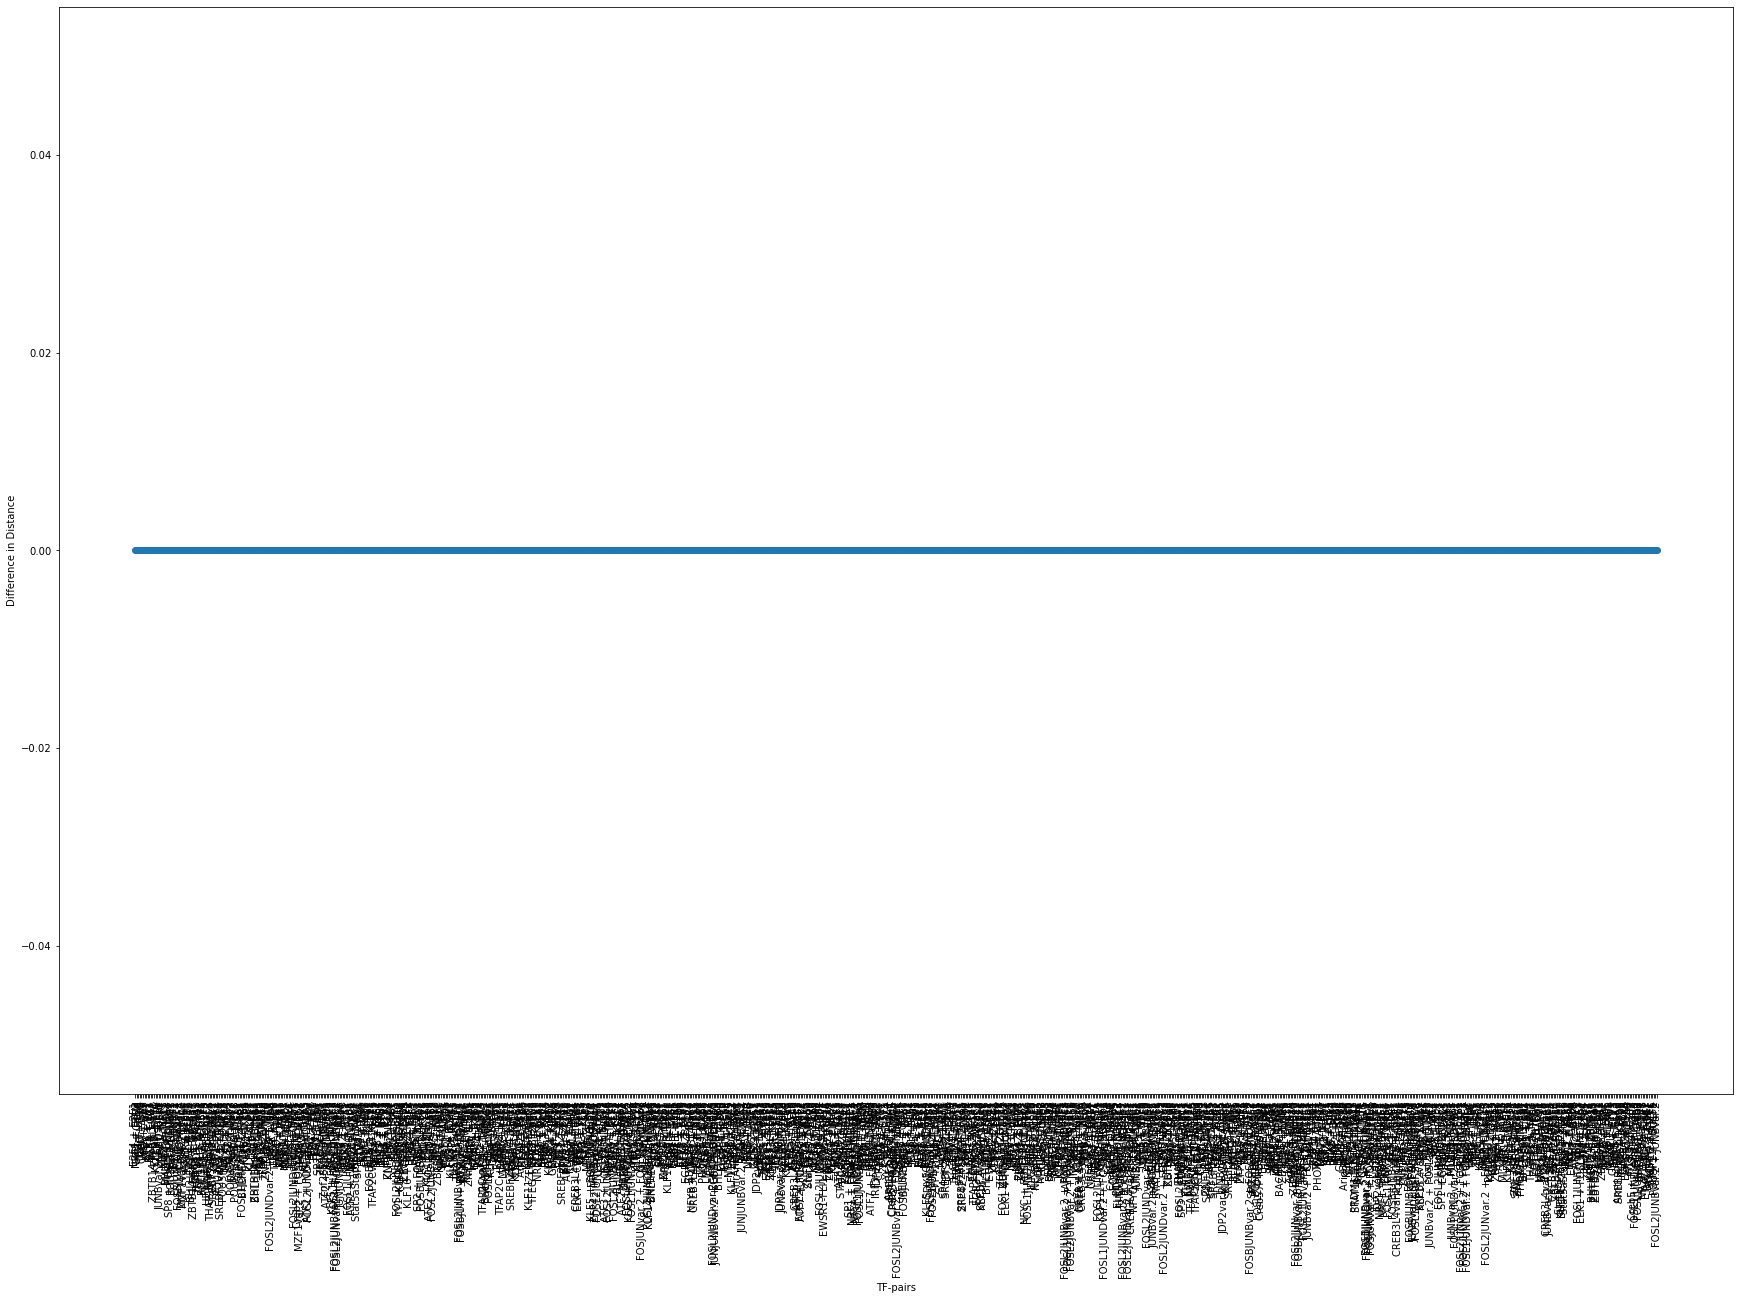

In [38]:
import matplotlib.pyplot as plt

differencedistance = df_distancedifference_2clusters_sorted['Difference between Distance']
TFpairs = df_distancedifference_2clusters_sorted['TF-pair']

plt.figure(figsize=(30, 20))
plt.scatter(TFpairs,differencedistance)
plt.xticks(rotation='vertical')
#plt.grid(True)
plt.xlabel('TF-pairs')
plt.ylabel('Difference in Distance')


plt.show()